## Project 4 - Train

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
pd.set_option('display.max_columns',150)
pd.set_option('display.max_rows',1500)

In [3]:
spray_path = '../datasets/spray.csv'
weather_path = '../datasets/weather.csv'
train_path = '../datasets/train.csv'
test_path = '../datasets/test.csv'

In [4]:
spray = pd.read_csv(spray_path)
weather = pd.read_csv(weather_path)
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

## Spray Data

In [5]:
#number of observations

spray.shape

(14835, 4)

In [6]:
#can see that there are multiple entries for a single day

spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [7]:
spray.describe()

,Latitude,Longitude
count,14835.000000,14835.000000
mean,41.904828,-87.736690
std,0.104381,0.067292
min,41.713925,-88.096468
25%,41.785001,-87.794225
50%,41.940075,-87.727853
75%,41.980978,-87.694108
max,42.395983,-87.586727


In [8]:
spray.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

In [9]:
# spray was done on 2 days in 2011 and 8 days in 2013
print(np.unique(spray['Date']))

spray['Date'].value_counts()

['2011-08-29' '2011-09-07' '2013-07-17' '2013-07-25' '2013-08-08'
 '2013-08-15' '2013-08-16' '2013-08-22' '2013-08-29' '2013-09-05']


2013-08-15    2668
2013-08-29    2302
2013-07-17    2202
2011-09-07    2114
2013-07-25    1607
2013-08-22    1587
2013-08-08    1195
2013-09-05     924
2013-08-16     141
2011-08-29      95
Name: Date, dtype: int64

In [10]:
spray.dtypes

Date          object
Time          object
Latitude     float64
Longitude    float64
dtype: object

In [11]:
spray.groupby(by ='Date')['Time'].value_counts()

Date        Time      
2011-08-29  6:56:58 PM    1
            6:57:08 PM    1
            6:57:18 PM    1
            6:57:28 PM    1
            6:57:38 PM    1
                         ..
2013-09-05  8:40:16 PM    1
            8:40:26 PM    1
            8:40:36 PM    1
            8:40:46 PM    1
            8:40:56 PM    1
Name: Time, Length: 12325, dtype: int64

In [12]:
#541 rows that are duplicated 

spray[spray.duplicated()].shape

(541, 4)

In [13]:
duplicate_index = spray[spray.duplicated()].index

In [14]:
spray.drop(index = duplicate_index, inplace=True)


In [15]:
spray.shape

(14294, 4)

In [16]:
# no more duplicates
spray[spray.duplicated()].shape

(0, 4)

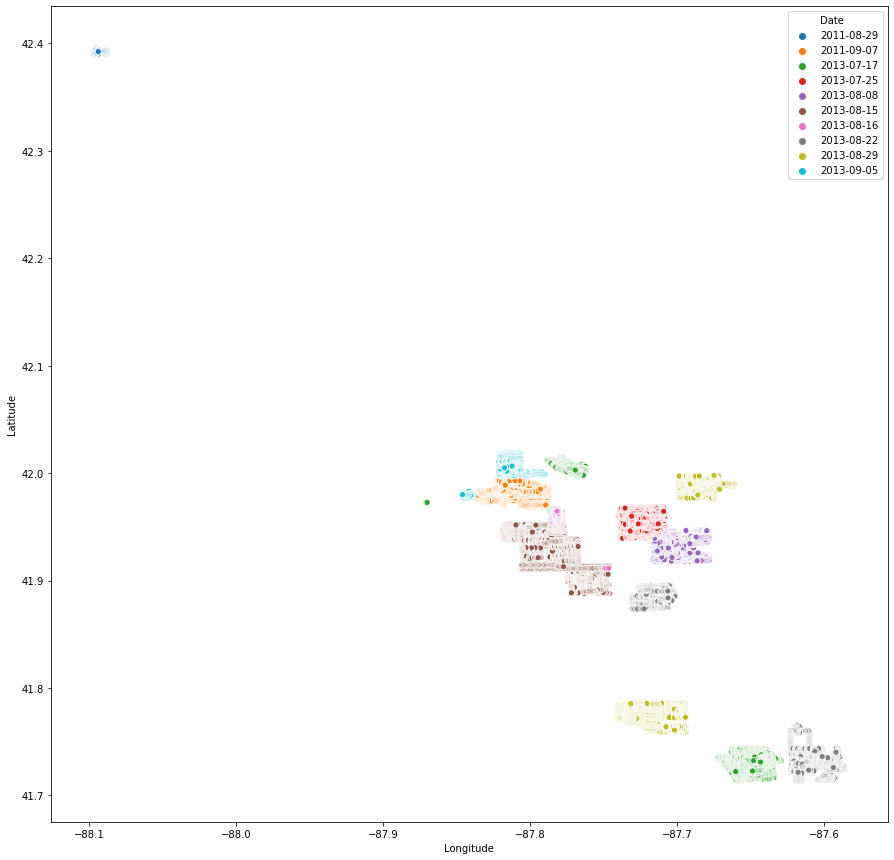

In [17]:
X= spray['Longitude']
y = spray['Latitude']

plt.figure(figsize=(15,15))
sns.scatterplot(X,y,hue=spray['Date'])


In [18]:
spray['year'] = spray['Date'].str.split('-')

In [19]:
spray['year'] = [y[0] for y in spray['year']]

In [20]:
spray['year'].value_counts()

2013    12626
2011     1668
Name: year, dtype: int64

In [21]:
spray.tail()

,Date,Time,Latitude,Longitude,year
14830,2013-09-05,8:34:11 PM,42.006587,-87.812355,2013
14831,2013-09-05,8:35:01 PM,42.006192,-87.816015,2013
14832,2013-09-05,8:35:21 PM,42.006022,-87.817392,2013
14833,2013-09-05,8:35:31 PM,42.005453,-87.817423,2013
14834,2013-09-05,8:35:41 PM,42.004805,-87.817460,2013


## Weather

In [22]:
weather.head(120)

#station 1 & 2, refers to location? 

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
5,2,2007-05-03,67,48,58,M,40,50,7,0,-,-,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2
6,1,2007-05-04,66,49,58,4,41,50,7,0,0444,1852,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
7,2,2007-05-04,78,51,M,M,42,50,M,M,-,-,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
8,1,2007-05-05,66,53,60,5,38,49,5,0,0443,1853,,0,M,0.0,T,29.40,30.10,11.7,7,12.0
9,2,2007-05-05,66,54,60,M,39,50,5,0,-,-,,M,M,M,T,29.46,30.09,11.2,7,11.5


In [23]:
# Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
# Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

In [24]:
weather.shape

(2944, 22)

In [25]:
weather.isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

In [26]:
2944/2

1472.0

In [27]:
weather[(weather['Station']==1) & (weather['SnowFall']== 'M')].shape

(0, 22)

Dew Point Temperature - Tdp
The Dew Point is the temperature where water vapor starts to condense out of the air (the temperature at which air becomes completely saturated). Above this temperature the moisture stays in the air.

if the dew-point temperature is close to the dry air temperature -  the relative humidity is high
if the dew point is well below the dry air temperature - the relative humidity is low

https://iridl.ldeo.columbia.edu/dochelp/QA/Basic/dewpoint.html

In [28]:
Td -> dewpoint
Td = T - ((100 - RH)/5.)
RH = 100 -5(T-Td)

SyntaxError: invalid syntax (<ipython-input-28-b3046d6acd47>, line 1)

In [ ]:
weather['year_split'] = weather['Date'].str.split('-')

In [ ]:
weather['year'] = [y[0] for y in weather['year_split']]
weather['year']

In [ ]:
weather['year'].value_counts()

In [ ]:
weather['month'] = [y[1] for y in weather['year_split']]
weather['month']

In [ ]:
weather['day'] = [y[2] for y in weather['year_split']]
weather['day']

## Train Dataset

In [ ]:
train.shape

In [ ]:
train.head()

In [ ]:
train.describe()

In [ ]:
train.isnull().sum()

In [ ]:
train.dtypes

In [ ]:
train['WnvPresent'].value_counts()

In [ ]:
# duplicate rows 

train[train.duplicated()].shape

In [ ]:
train[train.duplicated()].index

In [ ]:
train['year_split'] = train['Date'].str.split('-')
train['year_split']

In [ ]:
train['year'] = [y[0] for y in train['year_split']]
train['year']

In [ ]:
train['year'].value_counts()

In [ ]:
train['month'] = [y[1] for y in train['year_split']]
train['month']

In [ ]:
train['day'] = [y[2] for y in train['year_split']]
train['day']

In [ ]:
train['Species'].value_counts()

In [ ]:
train.groupby(by='Species')['WnvPresent'].value_counts()

In [ ]:
#only 3 species have observed WNV presence -> pipiens, restuans, pipien/restuans 
X= train['Species']
y = train['WnvPresent']

plt.figure(figsize=(12,12))
sns.scatterplot(y,X);

In [ ]:
X= train['Longitude']
y = train['Latitude']

plt.figure(figsize=(15,15))
sns.scatterplot(X,y,hue=train['WnvPresent'])


In [ ]:
train['AddressAccuracy'].value_counts()

In [ ]:
sns.distplot(train['AddressAccuracy'], kde=False)

In [ ]:
train['Trap'].value_counts()

In [ ]:
#136 unique traps, where 2 are satellite traps (postfix)
len(np.unique(train['Trap']))

In [ ]:
# sns.distplot(train['Trap'], kde=False)

In [ ]:
train['NumMosquitos'].value_counts()

In [ ]:
sns.distplot(train['NumMosquitos'], kde=False)

In [ ]:
sns.distplot(train['NumMosquitos'], kde=False)